## Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Exploring data

In [ ]:
# Define file paths
us_city_data_path = '/content/drive/My Drive/Datathon/Thilak/merged_df.csv'
world_country_data_path = '/content/drive/My Drive/Datathon/world_country_data.xlsx'
nba_financial_data_path = '/content/drive/My Drive/Datathon/Thilak/df1.xlsx'
# us_gdp = '/content/drive/MyDrive/Datathon/Sweta/USA_GDP.xlsx'


# Read the Excel files into DataFrame objects
us_city_df = pd.read_csv(us_city_data_path)
world_country_data = pd.read_excel(world_country_data_path)
nba_financial_data = pd.read_excel(nba_financial_data_path)
# us_gdp_data = pd.read_excel(us_gdp)


# Display the first few rows of each DataFrame
print("US City Data:")
print(us_city_df.head())

print("\nWorld Country Data:")
print(world_country_data.head())

print("\nNBA Financial Data:")
print(nba_financial_data.head())

# print('\nUS GDP Data:')
# print(us_gdp_data.head())

US City Data:
    city_ascii state_id       State  county_fips  county_name  \
0     New York       NY    New York        36081       Queens   
1  Los Angeles       CA  California         6037  Los Angeles   
2      Chicago       IL    Illinois        17031         Cook   
3        Miami       FL     Florida        12086   Miami-Dade   
4      Houston       TX       Texas        48201       Harris   

                 county_fips_all                       county_name_all  \
0  36081|36047|36085|36005|36061  Queens|Kings|Richmond|Bronx|New York   
1                           6037                           Los Angeles   
2                    17031|17043                           Cook|DuPage   
3                          12086                            Miami-Dade   
4              48201|48157|48339           Harris|Fort Bend|Montgomery   

       lat       lng  population  ...  cbsa_fips  \
0  40.6943  -73.9249  18908608.0  ...    35620.0   
1  34.1141 -118.4068  11922389.0  ...    31080

In [ ]:
print("us_city_data: ")
print(us_city_df.columns)
print("world_country_data: ")
print(world_country_data.columns)
print("nba_financial_data: ")
print(nba_financial_data.columns)
# print('us_gdp_data:')
# print(us_gdp_data.columns)

us_city_data: 
Index(['city_ascii', 'state_id', 'State', 'county_fips', 'county_name',
       'county_fips_all', 'county_name_all', 'lat', 'lng', 'population',
       'population_proper', 'density', 'source', 'military', 'incorporated',
       'cdp', 'township', 'timezone', 'ranking', 'zips', 'id', 'age_median',
       'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s',
       'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'age_over_65',
       'age_18_to_24', 'age_over_18', 'male', 'female', 'married', 'divorced',
       'never_married', 'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
    

In [ ]:
# # Merging the us_city dataframe and GDP column to add GDP column
# us_city_data = pd.merge(us_city_df, us_gdp_data[['Major City', 'GDP - Million USD']], how='left', left_on='city', right_on='Major City')

# # Drop redundant column
# us_city_data.drop(columns='Major City', inplace=True)

# us_city_data.head()

In [ ]:
# Filter out cities without an NBA team in their state
cities_with_teams = nba_financial_data['State'].unique()
filtered_cities = us_city_df[~us_city_df['State'].isin(cities_with_teams)]
filtered_cities = filtered_cities[filtered_cities['State'] != 'District of Columbia']

# Sort cities based on population and income_household_median
sorted_cities = filtered_cities.sort_values(by=['population', 'income_household_median'], ascending=[False, False])

# Select the top 5 cities
top_cities_with_high_income = sorted_cities.head(5)

print("Top 5 cities without an NBA team based on population and income:")
print(top_cities_with_high_income[['city_ascii', 'State', 'population', 'income_household_median']].reset_index(drop=True))


Top 5 cities without an NBA team based on population and income:
  city_ascii        State  population  income_household_median
0    Seattle   Washington   3561397.0                 116068.0
1  Las Vegas       Nevada   2248047.0                  66356.0
2  Baltimore     Maryland   2196524.0                  58349.0
3  St. Louis     Missouri   2130881.0                  52941.0
4   San Juan  Puerto Rico   1814587.0                  26610.0


## Visualizations

In [ ]:
# import plotly.graph_objects as go
# import matplotlib.pyplot as plt

# # Population Plot
# population_trace = go.Bar(
#     x=top_cities_with_high_income['city_ascii'],
#     y=top_cities_with_high_income['population'],
#     name='Population',
#     marker_color='#71bf6d'
# )
# population_layout = go.Layout(
#     title='Population of Top 5 Cities without NBA Teams',
#     xaxis=dict(title='City'),
#     yaxis=dict(title='Population')
# )
# fig_population = go.Figure(data=[population_trace], layout=population_layout)
# fig_population.update_xaxes(tickangle=45, tickfont=dict(size=10))
# fig_population.show()

# # Income Plot
# income_trace = go.Bar(
#     x=top_cities_with_high_income['city_ascii'],
#     y=top_cities_with_high_income['income_household_median'],
#     name='Median Household Income',
#     marker_color='#12785e'
# )
# income_layout = go.Layout(
#     title='Median Household Income of Top 5 Cities without NBA Teams',
#     xaxis=dict(title='City'),
#     yaxis=dict(title='Median Household Income')
# )
# fig_income = go.Figure(data=[income_trace], layout=income_layout)
# fig_income.update_xaxes(tickangle=45, tickfont=dict(size=10))
# fig_income.show()

# # Scatter Plot - Population vs. Median Household Income
# plt.figure(figsize=(10, 6))
# plt.scatter(top_cities_with_high_income['population'], top_cities_with_high_income['income_household_median'], color='#fde5c8')
# plt.title('Population vs. Median Household Income of Top Cities')
# plt.xlabel('Population')
# plt.ylabel('Median Household Income ($)')
# plt.grid(True)
# plt.show()

# # Bar Plot - Population Density of Top Cities
# plt.figure(figsize=(10, 6))
# plt.bar(top_cities_with_high_income['city_ascii'], top_cities_with_high_income['density'], color='#71bf6d')
# plt.title('Population Density of Top Cities')
# plt.xlabel('City')
# plt.ylabel('Population Density (People per square kilometer)')
# plt.xticks(rotation=45, ha='right')
# plt.grid(axis='y')
# plt.show()

# # Bar Plot - Age Distribution in Top Cities
# age_columns = ['age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_over_80']
# age_distribution = top_cities_with_high_income[age_columns].mean()

# plt.figure(figsize=(10, 6))
# age_distribution.plot(kind='bar', color='#12785e')
# plt.title('Age Distribution in Top Cities')
# plt.xlabel('Age Group')
# plt.ylabel('Percentage (%)')
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.show()

# # Bar Plot - Education Levels in Top Cities
# education_columns = ['education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate']
# education_levels = top_cities_with_high_income[education_columns].mean()

# plt.figure(figsize=(10, 6))
# education_levels.plot(kind='bar', color='#fde5c8')
# plt.title('Education Levels in Top Cities')
# plt.xlabel('Education Level')
# plt.ylabel('Percentage (%)')
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.show()

# # Bar Plot - Racial and Ethnic Diversity in Top Cities
# racial_columns = ['race_white', 'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other', 'race_multiple', 'hispanic']
# racial_diversity = top_cities_with_high_income[racial_columns].mean()

# plt.figure(figsize=(10, 6))
# racial_diversity.plot(kind='bar', color='#8f4a20')
# plt.title('Racial and Ethnic Diversity in Top Cities')
# plt.xlabel('Race/Ethnicity')
# plt.ylabel('Percentage (%)')
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.show()


In [ ]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Population Plot
population_trace = go.Bar(
    x=top_cities_with_high_income['city_ascii'],
    y=top_cities_with_high_income['population'],
    name='Population',
    marker_color='#71bf6d'
)
population_layout = go.Layout(
    title='Population of Top 5 Cities without NBA Teams',
    xaxis=dict(title='City'),
    yaxis=dict(title='Population')
)
fig_population = go.Figure(data=[population_trace], layout=population_layout)
fig_population.update_xaxes(tickangle=45, tickfont=dict(size=10))
fig_population.show()



In [ ]:
# Income Plot
income_trace = go.Bar(
    x=top_cities_with_high_income['city_ascii'],
    y=top_cities_with_high_income['income_household_median'],
    name='Median Household Income',
    marker_color='#12785e'
)
income_layout = go.Layout(
    title='Median Household Income of Top 5 Cities without NBA Teams',
    xaxis=dict(title='City'),
    yaxis=dict(title='Median Household Income')
)
fig_income = go.Figure(data=[income_trace], layout=income_layout)
fig_income.update_xaxes(tickangle=45, tickfont=dict(size=10))
fig_income.show()





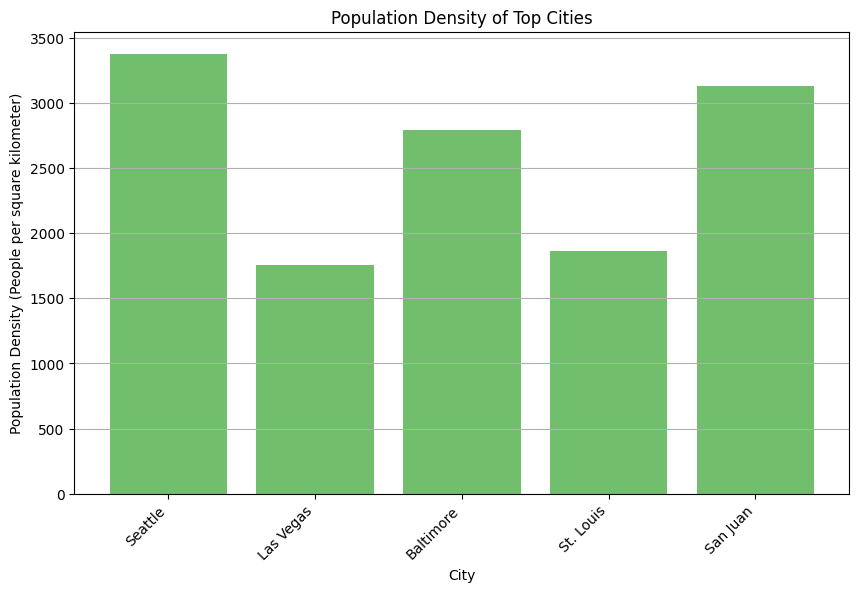

In [ ]:

# Bar Plot - Population Density of Top Cities
plt.figure(figsize=(10, 6))
plt.bar(top_cities_with_high_income['city_ascii'], top_cities_with_high_income['density'], color='#71bf6d')
plt.title('Population Density of Top Cities')
plt.xlabel('City')
plt.ylabel('Population Density (People per square kilometer)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()



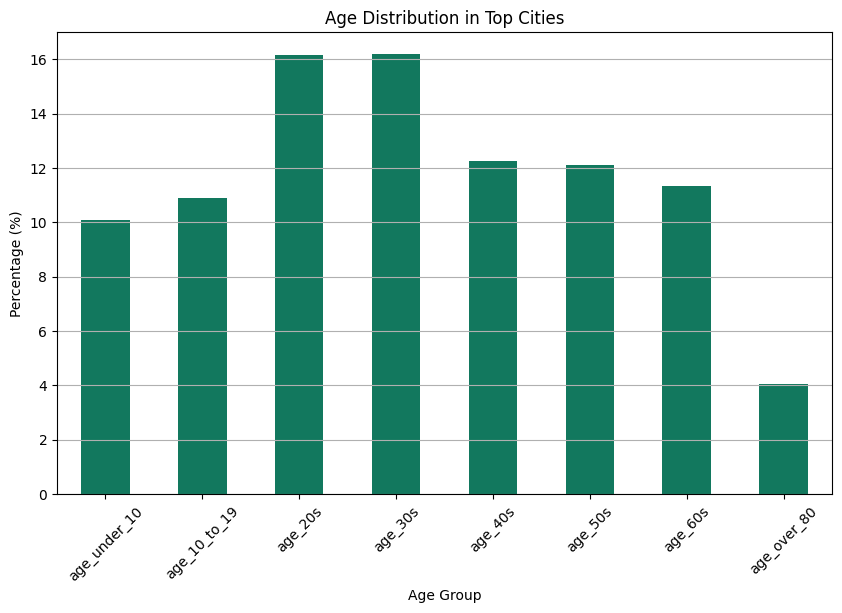

In [ ]:
# Bar Plot - Age Distribution in Top Cities
age_columns = ['age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_over_80']
age_distribution = top_cities_with_high_income[age_columns].mean()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='#12785e')
plt.title('Age Distribution in Top Cities')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



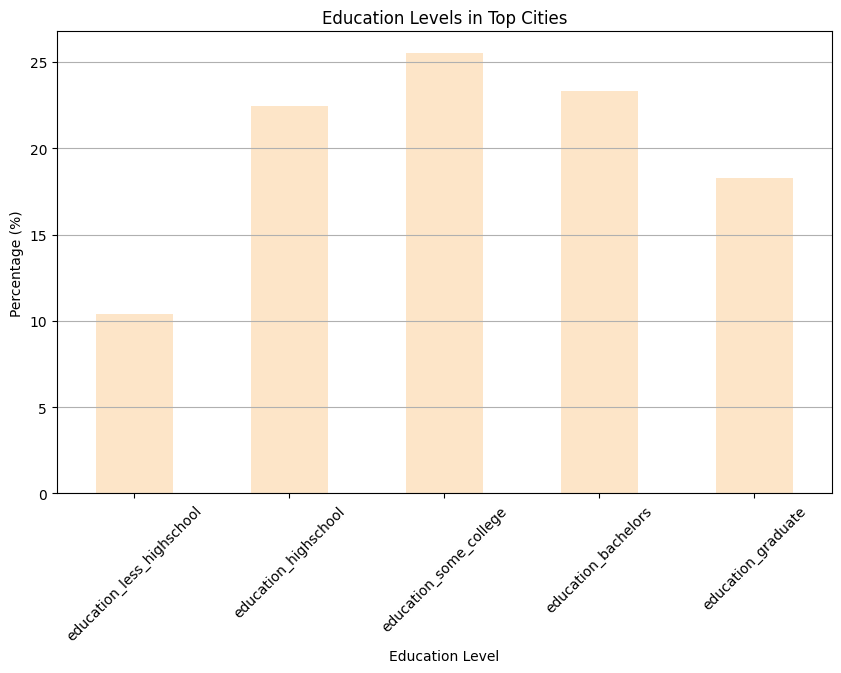

In [ ]:
# Bar Plot - Education Levels in Top Cities
education_columns = ['education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate']
education_levels = top_cities_with_high_income[education_columns].mean()

plt.figure(figsize=(10, 6))
education_levels.plot(kind='bar', color='#fde5c8')
plt.title('Education Levels in Top Cities')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


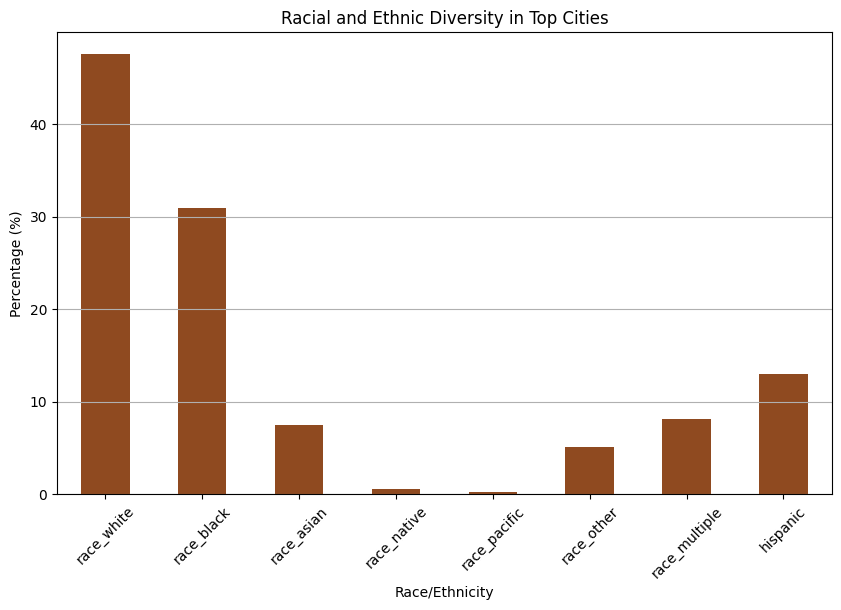

In [ ]:

# Bar Plot - Racial and Ethnic Diversity in Top Cities
racial_columns = ['race_white', 'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other', 'race_multiple', 'hispanic']
racial_diversity = top_cities_with_high_income[racial_columns].mean()

plt.figure(figsize=(10, 6))
racial_diversity.plot(kind='bar', color='#8f4a20')
plt.title('Racial and Ethnic Diversity in Top Cities')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# import plotly.graph_objects as go

# # Create population plot
# population_trace = go.Bar(x=top_cities_with_high_income['city_ascii'], y=top_cities_with_high_income['population'], name='Population', marker_color='skyblue')
# population_layout = go.Layout(title='Population of Top 5 Cities without NBA Teams', xaxis=dict(title='City'), yaxis=dict(title='Population'))

# # Create income plot
# income_trace = go.Bar(x=top_cities_with_high_income['city_ascii'], y=top_cities_with_high_income['income_household_median'], name='Median Household Income', marker_color='lightgreen')
# income_layout = go.Layout(title='Median Household Income of Top 5 Cities without NBA Teams', xaxis=dict(title='City'), yaxis=dict(title='Median Household Income'))

# # Show population plot
# fig_population = go.Figure(data=[population_trace], layout=population_layout)
# fig_population.update_xaxes(tickangle=45, tickfont=dict(size=10))

# # Show income plot
# fig_income = go.Figure(data=[income_trace], layout=income_layout)
# fig_income.update_xaxes(tickangle=45, tickfont=dict(size=10))

# # Show plots
# fig_population.show()
# fig_income.show()


### Let's now propose 2 new cities for NBA teams based on additional factors

In [ ]:
#'city',  'state_name', 'population',  'ranking','zips', 'age_median', 'male', 'female',
#'family_dual_income', 'income_household_median', 'income_individual_median', 'home_value', 'rent_median','unemployment_rate', GDP
#'race_white', 'race_black', 'race_asian','race_native', 'race_pacific', 'race_other', 'race_multiple','hispanic',
#'commute_time', 'cbsa_fips', 'cbsa_name', 'cbsa_metro','csa_fips', 'csa_name'

In [ ]:
# # Define weights for demographic features
# weight_white = 0.37
# weight_black = 0.21
# weight_asian = 0.05
# weight_native = 0.01
# weight_pacific = 0.0
# weight_other = 0.05
# weight_multiple = 0.09
# weight_hispanic = 0.22

# # Combine race columns to create 'Total Demographics' with weighted sum
# top_cities_with_high_income['Total Demographics'] = (
#     top_cities_with_high_income['race_white'] * weight_white +
#     top_cities_with_high_income['race_black'] * weight_black +
#     top_cities_with_high_income['race_asian'] * weight_asian +
#     top_cities_with_high_income['race_native'] * weight_native +
#     top_cities_with_high_income['race_pacific'] * weight_pacific +
#     top_cities_with_high_income['race_other'] * weight_other +
#     top_cities_with_high_income['race_multiple'] * weight_multiple +
#     top_cities_with_high_income['hispanic'] * weight_hispanic
# )

# # Combine economic indicators to create 'Economic Indicators'
# top_cities_with_high_income['Economic Indicators'] = ((top_cities_with_high_income['income_household_median'] - top_cities_with_high_income['rent_median']) + top_cities_with_high_income['GDP_Million_USD'])

# # Combine CBSA metro flag, commute time, and CSA information to create 'Geographic Factors'
# # Define weights for each component
# weight_cbsa_metro = 0.2
# weight_commute_time = 0.1
# weight_csa = 0.1

# # Create 'Geographic Factors' column
# top_cities_with_high_income['Geographic Factors'] = (top_cities_with_high_income['cbsa_metro'].astype(int) * weight_cbsa_metro) + (1 - top_cities_with_high_income['commute_time'] / top_cities_with_high_income['commute_time'].max()) * weight_commute_time + (top_cities_with_high_income['csa_fips'].notnull().astype(int) * weight_csa)

# # Drop individual race columns since they are no longer needed
# top_cities_with_high_income.drop(columns=['race_white', 'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other', 'race_multiple', 'hispanic'], inplace=True)

# # Normalize the composite columns
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Normalize the composite columns
# top_cities_with_high_income[['Total Demographics', 'Economic Indicators', 'Geographic Factors']] = scaler.fit_transform(top_cities_with_high_income[['Total Demographics', 'Economic Indicators', 'Geographic Factors']])

# # weights
# weight_demographics = 0.3
# weight_economic = 0.4
# weight_geographic = 0.3

# # composite score for each city
# top_cities_with_high_income['Composite Score'] = (top_cities_with_high_income['Total Demographics'] * weight_demographics) + \
#                                                  (top_cities_with_high_income['Economic Indicators'] * weight_economic) + \
#                                                  (top_cities_with_high_income['Geographic Factors'] * weight_geographic)

# # Rank the cities and select the top 2
# top_2_cities = top_cities_with_high_income.nlargest(5, 'Composite Score')

# # Display the top 2 cities
# print("Top 5 Cities:")
# print(top_2_cities[['city_ascii', 'State', 'Composite Score']])


## Model

In [ ]:
top_cities_data = us_city_df[us_city_df['city_ascii'].isin(top_cities_with_high_income['city_ascii'])]
top_cities_data.head(5)


,city_ascii,state_id,State,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,...,cbsa_fips,cbsa_name,cbsa_metro,csa_fips,csa_name,City,hasNBAteam,City_encoded,State_encoded,GDP_Million_USD
12,Seattle,WA,Washington,53033,King,53033,King,47.6211,-122.3244,3561397.0,...,42660.0,"Seattle-Tacoma-Bellevue, WA",True,500.0,"Seattle-Tacoma, WA",Seattle,0,17426,47,479966.0
21,Las Vegas,NV,Nevada,32003,Clark,32003,Clark,36.2333,-115.2654,2248047.0,...,29820.0,"Las Vegas-Henderson-Paradise, NV",True,332.0,"Las Vegas-Henderson, NV",Las Vegas,0,10447,27,136198.0
22,Baltimore,MD,Maryland,24510,Baltimore,24510,Baltimore,39.3051,-76.6144,2196524.0,...,12580.0,"Baltimore-Columbia-Towson, MD",True,548.0,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",Baltimore,0,909,19,222967.0
23,St. Louis,MO,Missouri,29510,St. Louis,29510,St. Louis,38.6359,-90.2451,2130881.0,...,41180.0,"St. Louis, MO-IL",True,476.0,"St. Louis-St. Charles-Farmington, MO-IL",St. Louis,0,18499,24,187569.0
29,San Juan,PR,Puerto Rico,72127,San Juan,72127,San Juan,18.3985,-66.0610,1814587.0,...,41980.0,"San Juan-Bayamón-Caguas, PR",True,490.0,"San Juan-Bayamón, PR",San Juan,0,17070,38,NaN


In [ ]:
# Define weights for demographic features
weight_white = 0.37
weight_black = 0.21
weight_asian = 0.05
weight_native = 0.01
weight_pacific = 0.0
weight_other = 0.05
weight_multiple = 0.09
weight_hispanic = 0.22

# Combine race columns to create 'Total Demographics' with weighted sum
filtered_cities['Total Demographics'] = (
    filtered_cities['race_white'] * weight_white +
    filtered_cities['race_black'] * weight_black +
    filtered_cities['race_asian'] * weight_asian +
    filtered_cities['race_native'] * weight_native +
    filtered_cities['race_pacific'] * weight_pacific +
    filtered_cities['race_other'] * weight_other +
    filtered_cities['race_multiple'] * weight_multiple +
    filtered_cities['hispanic'] * weight_hispanic
)

# Combine economic indicators to create 'Economic Indicators'
filtered_cities['Economic Indicators'] = (filtered_cities['income_household_median'] - filtered_cities['rent_median'] + filtered_cities['GDP_Million_USD'])

# Combine CBSA metro flag, commute time, and CSA information to create 'Geographic Factors'
# Define weights for each component
weight_cbsa_metro = 0.2
weight_commute_time = 0.1
weight_csa = 0.1

# Create 'Geographic Factors' column
filtered_cities['Geographic Factors'] = (
    (filtered_cities['cbsa_metro'].astype(int) * weight_cbsa_metro) +
    (1 - filtered_cities['commute_time'] / filtered_cities['commute_time'].max()) * weight_commute_time +
    (filtered_cities['csa_fips'].notnull().astype(int) * weight_csa)
)

# Drop individual race columns since they are no longer needed
filtered_cities.drop(columns=['race_white', 'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other', 'race_multiple', 'hispanic'], inplace=True)
print(filtered_cities.head())


   city_ascii state_id        State  county_fips county_name county_fips_all  \
12    Seattle       WA   Washington        53033        King           53033   
21  Las Vegas       NV       Nevada        32003       Clark           32003   
22  Baltimore       MD     Maryland        24510   Baltimore           24510   
23  St. Louis       MO     Missouri        29510   St. Louis           29510   
29   San Juan       PR  Puerto Rico        72127    San Juan           72127   

   county_name_all      lat       lng  population  ...  csa_fips  \
12            King  47.6211 -122.3244   3561397.0  ...     500.0   
21           Clark  36.2333 -115.2654   2248047.0  ...     332.0   
22       Baltimore  39.3051  -76.6144   2196524.0  ...     548.0   
23       St. Louis  38.6359  -90.2451   2130881.0  ...     476.0   
29        San Juan  18.3985  -66.0610   1814587.0  ...     490.0   

                                          csa_name       City  hasNBAteam  \
12                              S

In [ ]:
# Normalize the composite columns
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the composite columns
filtered_cities[['Total Demographics', 'Economic Indicators', 'Geographic Factors', 'population', 'income_household_median']] = scaler.fit_transform(filtered_cities[['Total Demographics', 'Economic Indicators', 'Geographic Factors', 'population', 'income_household_median']])

# weights
weight_demographics = 0.1
weight_economic = 0.2
weight_geographic = 0.1
weight_population = 0.3
weight_income = 0.3

# composite score for each city
filtered_cities['Composite Score'] = (filtered_cities['Total Demographics'] * weight_demographics) + (filtered_cities['Economic Indicators'] * weight_economic) + (filtered_cities['Geographic Factors'] * weight_geographic) + (filtered_cities['population'] * weight_population) + (filtered_cities['income_household_median'] * weight_income)

# Rank the cities and select the top 2
top_2_cities = filtered_cities.nlargest(5, 'Composite Score')

# Display the top 2 cities
print("Top 5 Cities:")
print(top_2_cities[['city_ascii', 'State', 'Composite Score']])

Top 5 Cities:
     city_ascii       State  Composite Score
12      Seattle  Washington         0.782839
22    Baltimore    Maryland         0.478482
21    Las Vegas      Nevada         0.475104
23    St. Louis    Missouri         0.457248
35  Kansas City    Missouri         0.432266


## Seattle vs Las Vegas

In [ ]:
two_cities = pd.read_excel("/content/drive/My Drive/Datathon/Two_Cities.xlsx")

print(two_cities)
print(two_cities.columns)



  city_ascii state_id       State  county_fips county_name  county_fips_all  \
0    Seattle       WA  Washington        53033        King            53033   
1  Las Vegas       NV      Nevada        32003       Clark            32003   

  county_name_all      lat       lng  population  ...  cbsa_fips  \
0            King  47.6211 -122.3244     3561397  ...      42660   
1           Clark  36.2333 -115.2654     2248047  ...      29820   

                          cbsa_name cbsa_metro  csa_fips  \
0       Seattle-Tacoma-Bellevue, WA       True       500   
1  Las Vegas-Henderson-Paradise, NV       True       332   

                  csa_name       City  hasNBAteam City_encoded  State_encoded  \
0       Seattle-Tacoma, WA    Seattle           0        17426             47   
1  Las Vegas-Henderson, NV  Las Vegas           0        10447             27   

  GDP_Million_USD  
0          479966  
1          136198  

[2 rows x 94 columns]
Index(['city_ascii', 'state_id', 'State', 'county

## Visualizations

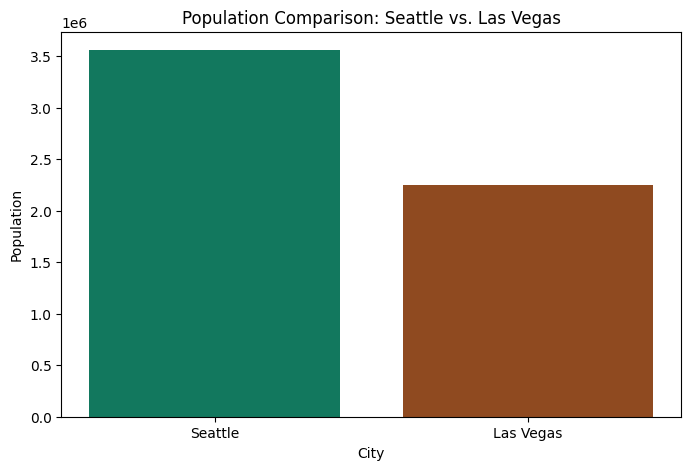

In [ ]:
  # Population Comparison
plt.figure(figsize=(8, 5))
plt.bar(['Seattle', 'Las Vegas'], two_cities['population'], color=['#12785e', '#8f4a20'])
plt.title('Population Comparison: Seattle vs. Las Vegas')
plt.xlabel('City')
plt.ylabel('Population')
plt.show()


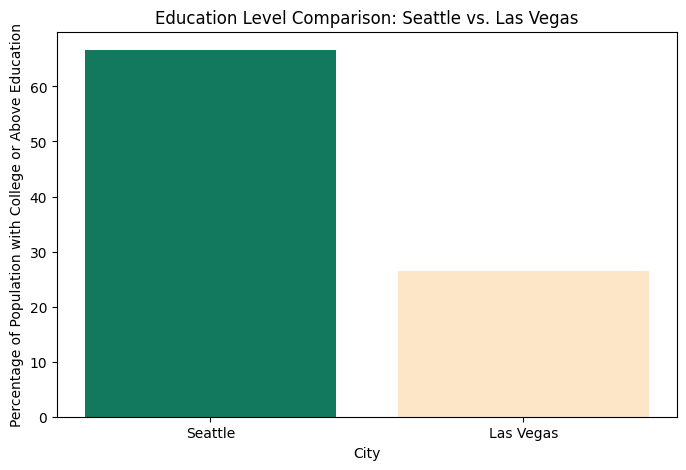

In [ ]:
# Education Level Comparison
plt.figure(figsize=(8, 5))
plt.bar(['Seattle', 'Las Vegas'], two_cities['education_college_or_above'], color=['#12785e', '#fde5c8'])
plt.title('Education Level Comparison: Seattle vs. Las Vegas')
plt.xlabel('City')
plt.ylabel('Percentage of Population with College or Above Education')
plt.show()


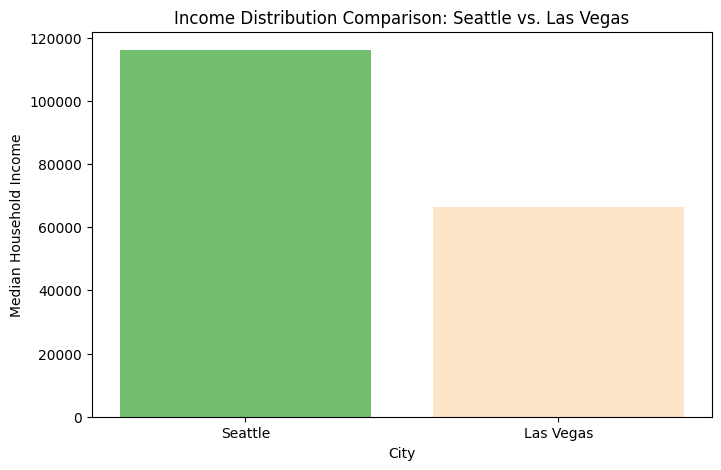

In [ ]:
# Income Distribution Comparison
plt.figure(figsize=(8, 5))
plt.bar(['Seattle', 'Las Vegas'], two_cities['income_household_median'], color=['#71bf6d', '#fde5c8'])
plt.title('Income Distribution Comparison: Seattle vs. Las Vegas')
plt.xlabel('City')
plt.ylabel('Median Household Income')
plt.show()


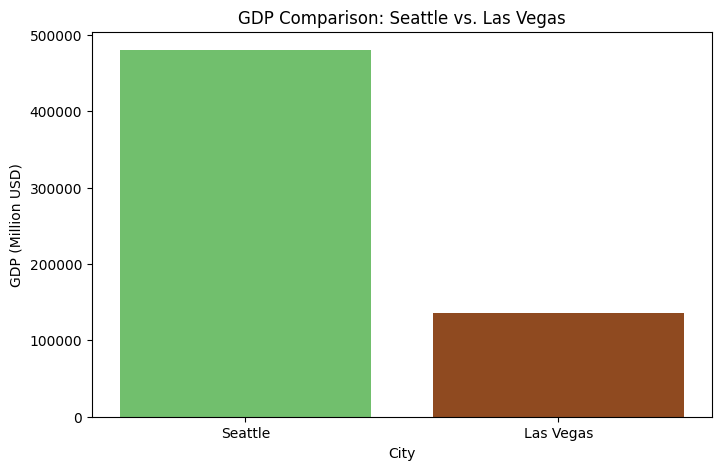

In [ ]:
# GDP Comparison
plt.figure(figsize=(8, 5))
plt.bar(['Seattle', 'Las Vegas'], two_cities['GDP_Million_USD'], color=['#71bf6d', '#8f4a20'])
plt.title('GDP Comparison: Seattle vs. Las Vegas')
plt.xlabel('City')
plt.ylabel('GDP (Million USD)')
plt.show()


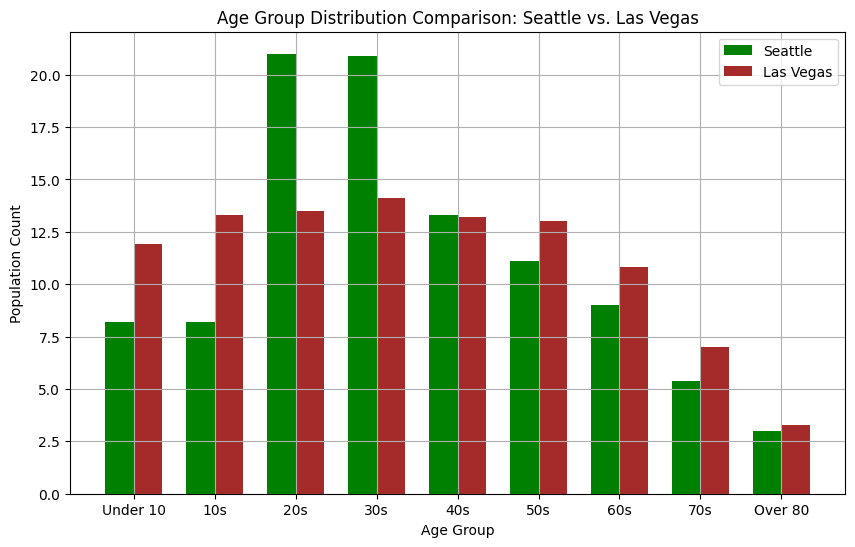

In [ ]:
# Age Group Distribution Comparison
seattle_age_groups = two_cities[['age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80']].loc[0]
las_vegas_age_groups = two_cities[['age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80']].loc[1]
age_groups = ['Under 10', '10s', '20s', '30s', '40s', '50s', '60s', '70s', 'Over 80']

# Set the width of the bars
bar_width = 0.35

# Set the x locations for the groups
index = np.arange(len(age_groups))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index - bar_width/2, seattle_age_groups, bar_width, label='Seattle', color='green')
plt.bar(index + bar_width/2, las_vegas_age_groups, bar_width, label='Las Vegas', color='brown')
plt.title('Age Group Distribution Comparison: Seattle vs. Las Vegas')
plt.xlabel('Age Group')
plt.ylabel('Population Count')
plt.xticks(index, age_groups)
plt.legend()
plt.grid(True)
plt.show()


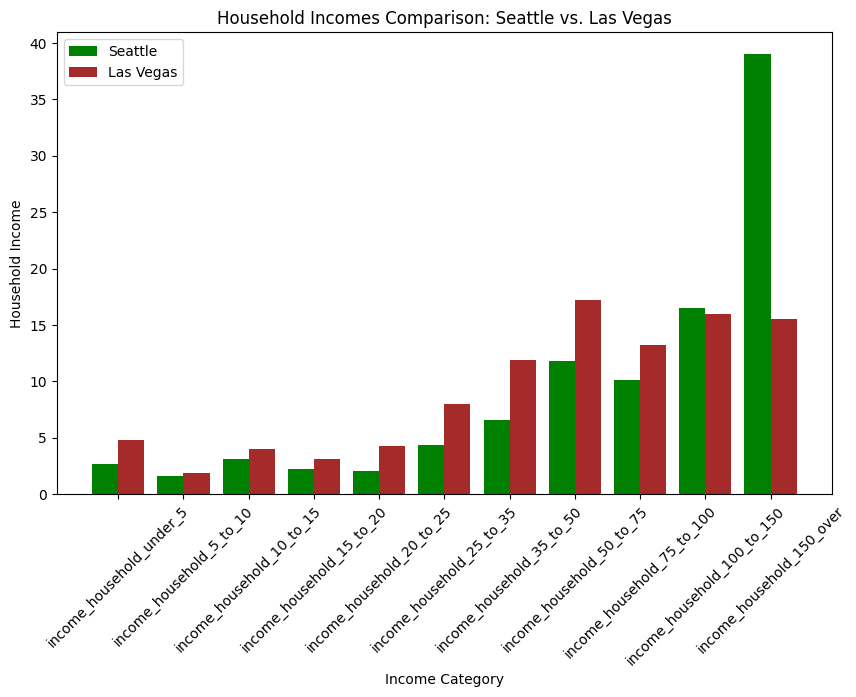

In [ ]:
# Household Incomes Comparison
plt.figure(figsize=(10, 6))
income_categories = ['income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15',
                     'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35',
                     'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100',
                     'income_household_100_to_150', 'income_household_150_over']
seattle_incomes = [two_cities.loc[0, category] for category in income_categories]
las_vegas_incomes = [two_cities.loc[1, category] for category in income_categories]
plt.bar(np.arange(len(income_categories)) - 0.2, seattle_incomes, width=0.4, label='Seattle', color='green')
plt.bar(np.arange(len(income_categories)) + 0.2, las_vegas_incomes, width=0.4, label='Las Vegas', color='brown')
plt.title('Household Incomes Comparison: Seattle vs. Las Vegas')
plt.xlabel('Income Category')
plt.ylabel('Household Income')
plt.xticks(np.arange(len(income_categories)), income_categories, rotation=45)
plt.legend()
plt.show()


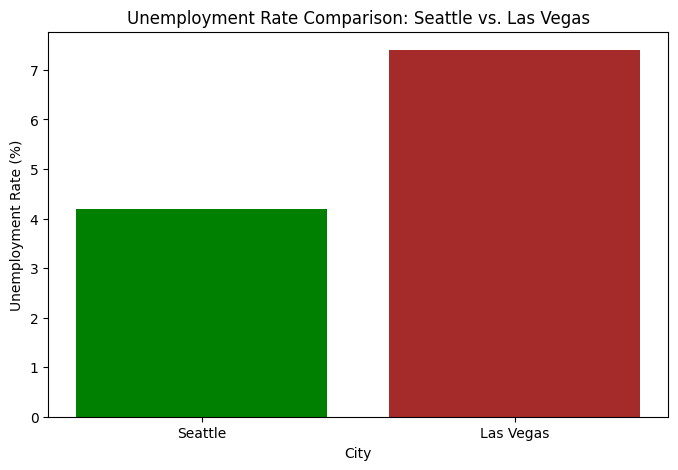

In [ ]:
# Unemployment Rate Comparison
plt.figure(figsize=(8, 5))
plt.bar(['Seattle', 'Las Vegas'], two_cities['unemployment_rate'], color=['green', 'brown'])
plt.title('Unemployment Rate Comparison: Seattle vs. Las Vegas')
plt.xlabel('City')
plt.ylabel('Unemployment Rate (%)')
plt.show()


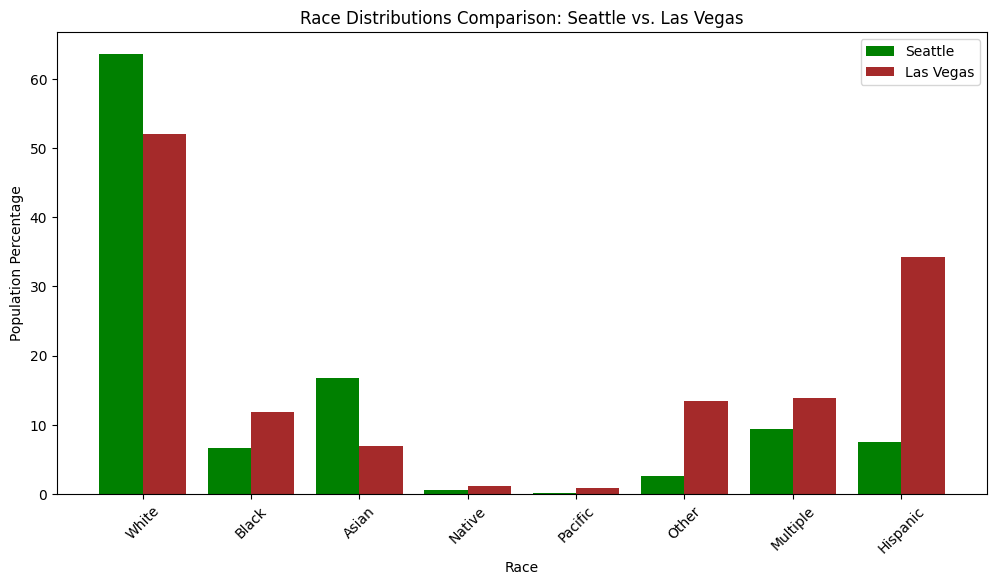

In [ ]:
# Race Distributions Comparison
race_categories = ['race_white', 'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other', 'race_multiple', 'hispanic']
race_labels = ['White', 'Black', 'Asian', 'Native', 'Pacific', 'Other', 'Multiple', 'Hispanic']
seattle_race_distribution = [two_cities.loc[0, category] for category in race_categories]
las_vegas_race_distribution = [two_cities.loc[1, category] for category in race_categories]

plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(race_labels)) - 0.2, seattle_race_distribution, width=0.4, label='Seattle', color='green')
plt.bar(np.arange(len(race_labels)) + 0.2, las_vegas_race_distribution, width=0.4, label='Las Vegas', color='brown')
plt.title('Race Distributions Comparison: Seattle vs. Las Vegas')
plt.xlabel('Race')
plt.ylabel('Population Percentage')
plt.xticks(np.arange(len(race_labels)), race_labels, rotation=45)
plt.legend()
plt.show()


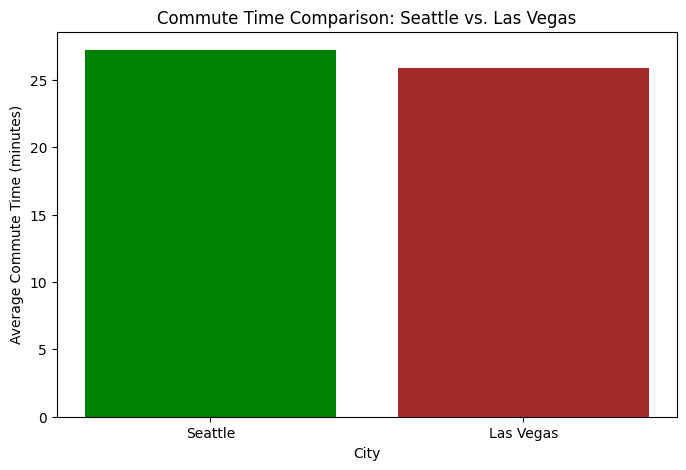

In [ ]:
# Commute Time Comparison
plt.figure(figsize=(8, 5))
plt.bar(['Seattle', 'Las Vegas'], two_cities['commute_time'], color=['green', 'brown'])
plt.title('Commute Time Comparison: Seattle vs. Las Vegas')
plt.xlabel('City')
plt.ylabel('Average Commute Time (minutes)')
plt.show()


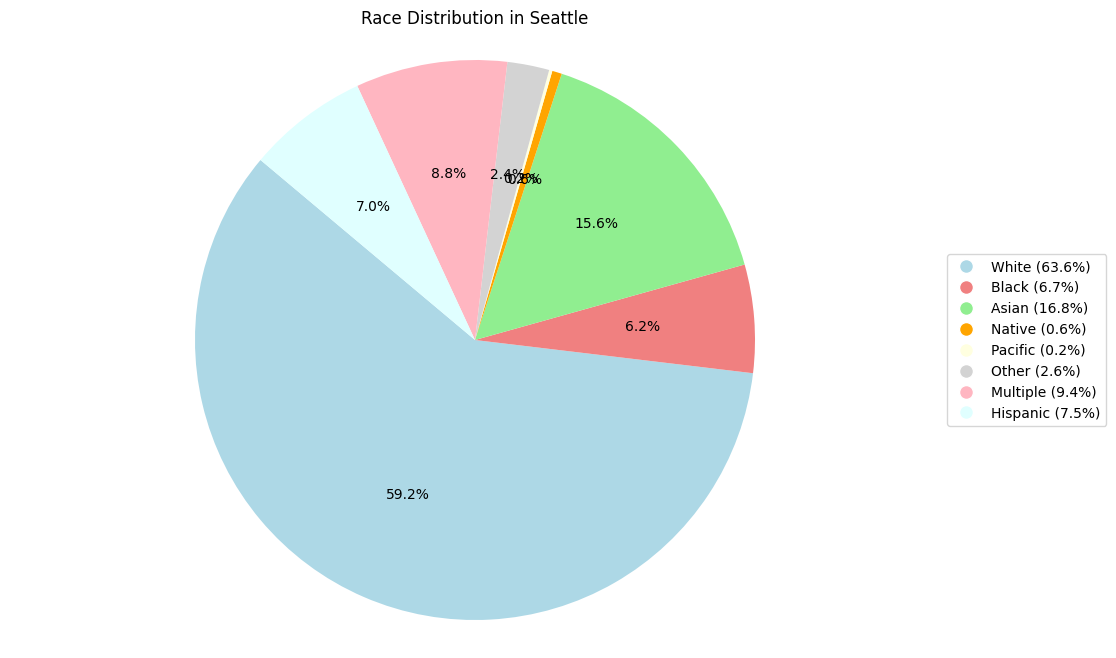

In [ ]:
# Race Distributions Comparison - Pie Charts
race_labels = ['White', 'Black', 'Asian', 'Native', 'Pacific', 'Other', 'Multiple', 'Hispanic']
race_colors = ['lightblue', 'lightcoral', 'lightgreen', 'orange', 'lightyellow', 'lightgrey', 'lightpink', 'lightcyan']

seattle_race_distribution = [two_cities.loc[0, category] for category in race_categories]
las_vegas_race_distribution = [two_cities.loc[1, category] for category in race_categories]

# Function to create custom legend with race labels, colors, and percentage values
def create_legend(labels, colors, percentages):
    legend_handles = []
    for label, color, percent in zip(labels, colors, percentages):
        legend_label = f"{label} ({percent:.1f}%)"
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=legend_label, markerfacecolor=color, markersize=10))
    return legend_handles

# Pie chart for Seattle
plt.figure(figsize=(12, 8))  # Increase figure size
seattle_pie = plt.pie(seattle_race_distribution, startangle=140, colors=race_colors, autopct='%1.1f%%', radius=1.2)  # Increase radius
plt.title('Race Distribution in Seattle')

# Create legend
plt.legend(handles=create_legend(race_labels, race_colors, seattle_race_distribution), loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

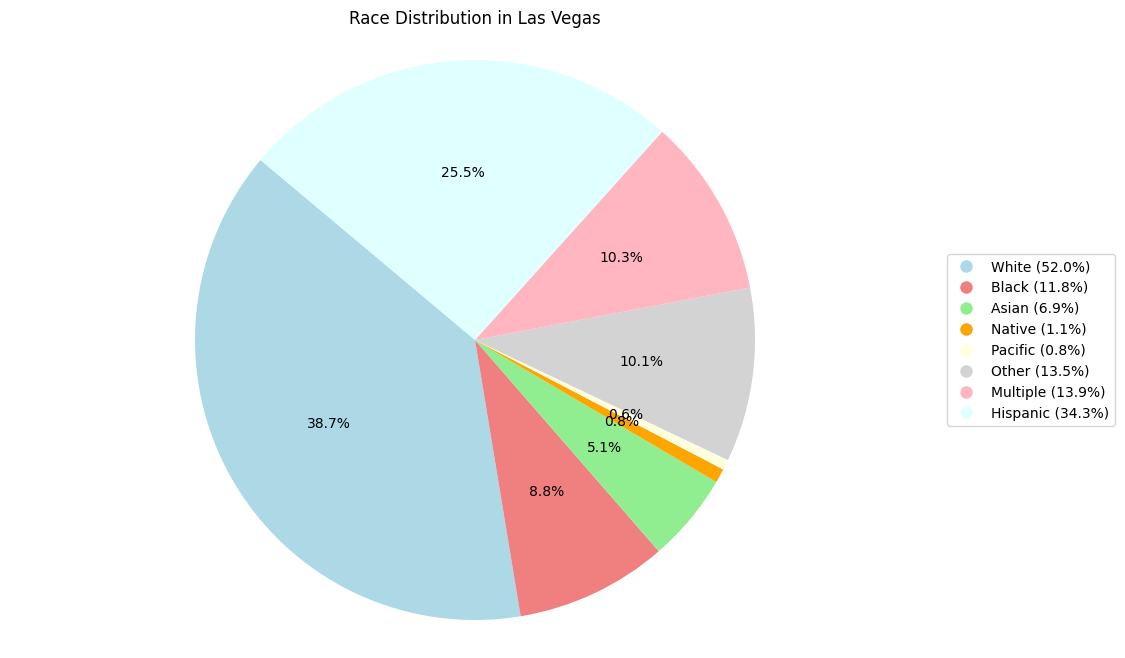

In [ ]:
# Pie chart for Las Vegas
plt.figure(figsize=(12, 8))  # Increase figure size
las_vegas_pie = plt.pie(las_vegas_race_distribution, startangle=140, colors=race_colors, autopct='%1.1f%%', radius=1.2)  # Increase radius
plt.title('Race Distribution in Las Vegas')

# Create legend
plt.legend(handles=create_legend(race_labels, race_colors, las_vegas_race_distribution), loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#international market

In [ ]:
# Extract the list of countries from the 'Country' column
countries_list = world_country_data['Country'].tolist()

# Print the list of countries
print("List of countries in the dataset:")
for country in countries_list:
    print(country)


List of countries in the dataset:
Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
The Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
Ivory Coast
Cape Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Republic of the Congo
Costa Rica
Croatia
Cuba
Cyprus
Czech Republic
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
The Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Vatican City
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Republic of Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Madagasc

In [ ]:
# List of target countries
target_countries = ['United States', 'China', 'United Kingdom', 'Philippines', 'Spain', 'Australia']

# Filter the dataset to include data for the target countries
target_country_data = world_country_data[world_country_data['Country'].isin(target_countries)]

# Print the filtered dataset
print(target_country_data)


            Country  Density\n(P/Km2) Abbreviation  Agricultural Land( %)  \
8         Australia                 3           AU                  0.482   
36            China               153           CN                  0.562   
138     Philippines               368           PH                  0.417   
164           Spain                94           ES                  0.526   
185  United Kingdom               281           GB                  0.717   
186   United States                36           US                  0.444   

     Land Area(Km2)  Armed Forces size  Birth Rate  Calling Code  \
8         7741220.0            58000.0       12.60          61.0   
36        9596960.0          2695000.0       10.90          86.0   
138        300000.0           153000.0       20.55          63.0   
164        505370.0           196000.0        7.90          34.0   
185        243610.0           148000.0       11.00          44.0   
186       9833517.0          1359000.0       11.60  

In [ ]:
world_country_data.columns


Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [ ]:
# import pandas as pd

# # Define the selected countries
# selected_countries = ['United States', 'China', 'United Kingdom', 'Philippines', 'Spain', 'Australia']

# # Extract relevant columns for the selected countries
# selected_data = world_country_data[world_country_data['Country'].isin(selected_countries)]

# # Define the relevant features for modeling
# features = ['Density\n(P/Km2)', 'GDP', 'Urban_population', 'Life expectancy',
#             'Gross primary education enrollment (%)', 'Physicians per thousand',
#             'Unemployment rate', 'Gasoline Price', 'Agricultural Land( %)', 'Tax revenue (%)']

# # Filter the data to include only the selected features
# selected_data = selected_data[features]

# # Handle missing values
# selected_data.fillna(selected_data.mean(), inplace=True)  # Fill missing values with mean

# # Normalize the data
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# selected_data = pd.DataFrame(scaler.fit_transform(selected_data), columns=features)

# # Define weights for each feature
# weights = {'Density\n(P/Km2)': 0.1, 'GDP': 0.15, 'Urban_population': 0.1, 'Life expectancy': 0.1,
#            'Gross primary education enrollment (%)': 0.1, 'Physicians per thousand': 0.1,
#            'Unemployment rate': 0.1, 'Gasoline Price': 0.1, 'Agricultural Land( %)': 0.1, 'Tax revenue (%)': 0.05}

# # Calculate the ranking score for each country
# selected_data['Ranking Score'] = selected_data[features].dot(pd.Series(weights))

# # Combine with country names
# selected_data['Country'] = selected_countries
# selected_data = selected_data[['Country', 'Ranking Score']]

# # Rank the countries based on the ranking score
# ranked_countries = selected_data.sort_values(by='Ranking Score', ascending=False)

# print("Ranking of Selected Countries:")
# print(ranked_countries)


In [ ]:
# Select the target countries
target_countries = ["United States", "China", "United Kingdom", "Philippines", "Spain", "Australia"]
selected_countries = world_country_data[world_country_data["Country"].isin(target_countries)]

# Define weights for each factor
weights = {'Density\n(P/Km2)': 0.2, 'GDP': 0.25, 'Urban_population': 0.2,
           'Gross primary education enrollment (%)': 0.16,
           'Unemployment rate': 0.12,  'Tax revenue (%)': 0.17}


# Normalize the data for each factor
for factor in weights.keys():
    selected_countries[factor] = selected_countries[factor] / selected_countries[factor].max()

# Calculate the ranking score for each country
selected_countries["Ranking Score"] = 0
for factor, weight in weights.items():
    selected_countries["Ranking Score"] += selected_countries[factor] * weight

# Sort the countries based on the ranking score
selected_countries = selected_countries.sort_values(by="Ranking Score", ascending=False).reset_index(drop=True)

# Print the ranking of selected countries
print("Ranking of Selected Countries:")
print(selected_countries[["Country", "Ranking Score"]])

Ranking of Selected Countries:
          Country  Ranking Score
0           China       0.762512
1   United States       0.669301
2  United Kingdom       0.551019
3     Philippines       0.487375
4           Spain       0.437833
5       Australia       0.368700


<ipython-input-26-8c4b389f4063>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-8c4b389f4063>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-8c4b389f4063>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

